## This Jupyter Notebook serves as a demo Workflow of cleaning and exploring IgE measurements with Pax for an allergen panel involve testing blood samples to detect Immunoglobulin E (IgE) antibody levels against specific allergens using the Pax system.

Fill in the empty code cells below. Feel free to add more code cells if needed.

### Data upload:
- Use the upload button on the left to upload the file: 'PAX_Data.xlsx'
- By default the data should have been upload to into the folder '/content'

## Load the required modules
- Just run the following code-cell to load all modules needed for this exercise

In [ ]:
import os
import pandas as pd
import numpy as np

### Checking the working directory:
- use 'os.getcwd()' method to check for the current working directory.
- If you are using Google Colab, the default working directory should be the folder 'content'
- If not, use the 'os. chdir(<path>)' method to make sure to set the working directory

In [ ]:
os.getcwd()

'/content'

## Read the excel file
- if you are not using Google Colab, make sure to set the path to your data file correctly: \'<FILE-PATH\>/PAX_Data.xlsx'
- use: 'Sheet1' as sheet_name
- ignore the header: header=None
- assign the loaded data to a variable called: df


In [ ]:
file_path = '/content/PAX_Data.xlsx'

df = pd.read_excel(file_path, sheet_name='Sheet1', header=None)
print(df)

              0                1               2               3     \
0     Date of test       2023-04-13      2023-04-13      2023-04-13   
1      Test number      2334000487D     2331000683D     2331000884D   
2          Country            Spain      Netherland         Germany   
3          Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4              Sex           Female            Male            Male   
..             ...              ...             ...             ...   
245         Sola t            22.05           22.33           22.33   
246      rSola t 2            22.36           24.08           24.08   
247  rSola t_GBSSI            23.43           24.02           24.02   
248      rHom s LF            27.51           27.94           27.94   
249        CCD-HSA               27           25.61           25.61   

               4                 5               6               7     \
0        2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1

### Print the 'shape' of the dataframe

In [ ]:
print(df.shape)

(250, 6616)


### Print the number of rows:

In [ ]:
print(df.shape[0])

250


### Use the 'head' method to have a look at the first 10 rows of the table

In [ ]:
print(df.head(10))

           0                1               2               3     \
0  Date of test       2023-04-13      2023-04-13      2023-04-13   
1   Test number      2334000487D     2331000683D     2331000884D   
2       Country            Spain      Netherland         Germany   
3       Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4           Sex           Female            Male            Male   
5         Cyn d             18.5           19.67           20.11   
6      rCyn d 1            22.99           21.95           20.66   
7         Dac g            19.15           19.57           21.78   
8         Fes p            21.84            21.3           26.96   
9      rLol p 1            22.33           22.23           22.59   

             4                 5               6               7     \
0      2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1     2331000880D       2331000851D     2331001025D     2331000881D   
2         Germany        Netherland   

### Splitting the Data:
- As you can see, row 0 to 4 contains the metadata of the experiment
- Row 5 to end contains the measured expression data of Allergens

Now, we need to split the data into:
- Metadata and
- Expression data

Check the documentation of the pandas method 'iloc'
- Split the data, row 0 to 4 and assing it to a variable called: md
- From row 5 to end, assing the expression data to a variable called: expr

In [ ]:
md = df.iloc[0:5, :]
expr = df.iloc[5:, :]




### Print the 'shape' of each new table

In [ ]:
print(md.shape)
print(expr.shape)


(5, 6616)
(245, 6616)


### Use the 'head' method to inspect the expr table


In [ ]:
print(expr.head())

       0      1      2      3      4      5      6      7      8      9     \
5     Cyn d   18.5  19.67  20.11  18.09  17.92  17.78  18.64   21.3   20.5   
6  rCyn d 1  22.99  21.95  20.66  21.68  20.56  21.62  22.83   23.2  25.07   
7     Dac g  19.15  19.57  21.78  18.37  18.12  19.35  19.95  21.52  20.55   
8     Fes p  21.84   21.3  26.96  24.05  23.21  22.62  21.98  24.55  20.39   
9  rLol p 1  22.33  22.23  22.59  21.99  23.16  21.27  22.99  23.95  21.35   

   ...   6606   6607   6608   6609   6610   6611   6612   6613   6614   6615  
5  ...  16.33  17.18  15.48  15.79  18.64  17.44  17.05  18.42  19.03  16.73  
6  ...  23.27  21.77  21.78  20.69  26.49  20.76  21.07  24.48   21.4  20.12  
7  ...  19.28  20.33  17.34  19.06  18.86  17.84  18.67  19.99  21.01   17.4  
8  ...  21.14  22.39  20.93  21.78  19.95  20.64  20.79  19.24  24.33  20.77  
9  ...  17.81  19.57  22.76  21.23  21.77  19.41  22.32  20.15   22.7  20.96  

[5 rows x 6616 columns]


As you can see column 0 contains the name of the Allergens

- Set the Allergen names as the index of the table (similar to rownames in R)example:   'expr.index = ...'
- 'drop' the column 0 and override the current variable

In [ ]:
expr.index = expr.iloc[:, 0]

In [ ]:
expr = expr.drop(columns=expr.columns[0])
print(expr)

                1      2      3      4      5      6      7      8      9     \
0                                                                              
Cyn d           18.5  19.67  20.11  18.09  17.92  17.78  18.64   21.3   20.5   
rCyn d 1       22.99  21.95  20.66  21.68  20.56  21.62  22.83   23.2  25.07   
Dac g          19.15  19.57  21.78  18.37  18.12  19.35  19.95  21.52  20.55   
Fes p          21.84   21.3  26.96  24.05  23.21  22.62  21.98  24.55  20.39   
rLol p 1       22.33  22.23  22.59  21.99  23.16  21.27  22.99  23.95  21.35   
...              ...    ...    ...    ...    ...    ...    ...    ...    ...   
Sola t         22.05  22.33  22.33  21.61  21.85  20.94  19.71  21.27  18.76   
rSola t 2      22.36  24.08  24.08  16.39  16.83  30.73  18.29   19.2  18.89   
rSola t_GBSSI  23.43  24.02  24.02  19.78  20.01  24.56  23.26  21.62  21.01   
rHom s LF      27.51  27.94  27.94  27.75  27.55   27.9  27.82  27.71  27.65   
CCD-HSA           27  25.61  25.61  24.0

### Cleaning the Metadata
- Use 'head' to look into the metadata
Note that we want to use the rows as columns, therefore:
- Transpose the metadata
- Change the table: row 0 should be the column names

In [ ]:
print(md.head())

           0                1               2               3     \
0  Date of test       2023-04-13      2023-04-13      2023-04-13   
1   Test number      2334000487D     2331000683D     2331000884D   
2       Country            Spain      Netherland         Germany   
3       Age Y/M  3Years 11Months  2Years 8Months  2Years 8Months   
4           Sex           Female            Male            Male   

             4                 5               6               7     \
0      2023-04-13        2023-04-13      2023-04-13      2023-04-13   
1     2331000880D       2331000851D     2331001025D     2331000881D   
2         Germany        Netherland          Sweden         Germany   
3  7Years 9Months  11Years 11Months  4Years 8Months  1Years 9Months   
4          Female              Male          Female            Male   

             8               9     ...            6606            6607  \
0      2023-04-13      2023-04-13  ...      2023-06-30      2023-06-30   
1     2331000879

In [ ]:
md_transposed = md.transpose()
print(md_transposed)


                 0            1           2                3       4
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


In [ ]:
md_transposed.columns = md_transposed.iloc[0]
print(md_transposed)

0     Date of test  Test number     Country          Age Y/M     Sex
0     Date of test  Test number     Country          Age Y/M     Sex
1       2023-04-13  2334000487D       Spain  3Years 11Months  Female
2       2023-04-13  2331000683D  Netherland   2Years 8Months    Male
3       2023-04-13  2331000884D     Germany   2Years 8Months    Male
4       2023-04-13  2331000880D     Germany   7Years 9Months  Female
...            ...          ...         ...              ...     ...
6611    2023-06-30  2334002232D    Slovenia   2Years 5Months    Male
6612    2023-06-30  2344000712D          UK   2Years 5Months    Male
6613    2023-06-30  2331003547D  Netherland   2Years 5Months    Male
6614    2023-06-30  2344000711D          UK   2Years 5Months    Male
6615    2023-06-30  2334002236D       Spain   2Years 5Months    Male

[6616 rows x 5 columns]


- Make sure to remove the first row, which now has become the column names

In [ ]:
md_transposed = md_transposed[1:]
print(md_transposed)

0    Date of test  Test number     Country           Age Y/M     Sex
1      2023-04-13  2334000487D       Spain   3Years 11Months  Female
2      2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3      2023-04-13  2331000884D     Germany    2Years 8Months    Male
4      2023-04-13  2331000880D     Germany    7Years 9Months  Female
5      2023-04-13  2331000851D  Netherland  11Years 11Months    Male
...           ...          ...         ...               ...     ...
6611   2023-06-30  2334002232D    Slovenia    2Years 5Months    Male
6612   2023-06-30  2344000712D          UK    2Years 5Months    Male
6613   2023-06-30  2331003547D  Netherland    2Years 5Months    Male
6614   2023-06-30  2344000711D          UK    2Years 5Months    Male
6615   2023-06-30  2334002236D       Spain    2Years 5Months    Male

[6615 rows x 5 columns]


### Use 'head' to inspect your table and make sure it looks as below:

	Date of test Test number	Country	Age Y/M**

1	2023-04-13	2334000487D	Spain	3Years 11Months

2	2023-04-13	2331000683D	Netherland	2Years 8Months

3	2023-04-13	2331000884D	Germany	2Years 8Months

4	2023-04-13	2331000880D	Germany	7Years 9Months

5	2023-04-13	2331000851D	Netherland	11Years 11Months

In [ ]:
print(md_transposed.head())

0 Date of test  Test number     Country           Age Y/M     Sex
1   2023-04-13  2334000487D       Spain   3Years 11Months  Female
2   2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3   2023-04-13  2331000884D     Germany    2Years 8Months    Male
4   2023-04-13  2331000880D     Germany    7Years 9Months  Female
5   2023-04-13  2331000851D  Netherland  11Years 11Months    Male


### Rename the Metadata columns
- rename the columns 'Date of test' to 'Date', 'Test number' to 'TestID' and 'Age Y/M' to 'Age (M)'

In [ ]:
md_transposed.rename(columns={
    'Date of test': 'Date',
    'Test number': 'TestID',
    'Age Y/M': 'Age (M)'
}, inplace=True)
print(md_transposed.head())

0        Date       TestID     Country           Age (M)     Sex
1  2023-04-13  2334000487D       Spain   3Years 11Months  Female
2  2023-04-13  2331000683D  Netherland    2Years 8Months    Male
3  2023-04-13  2331000884D     Germany    2Years 8Months    Male
4  2023-04-13  2331000880D     Germany    7Years 9Months  Female
5  2023-04-13  2331000851D  Netherland  11Years 11Months    Male


### Convert the Age column
The function below converts a string into a number of total month e.g.:

"2Years 8Months" convert to 32.0

- use the below function to convert each 'string' from the Age column into a number (float)
- Hint: check the function '.apply(convert_to_month)' which works on a dataframe column

In [ ]:
import re

def convert_to_months(duration_str):
        # Check for missing or empty entries
    if pd.isnull(duration_str) or duration_str.strip() == "":
        return None


    # Regular expression to find years and months in the input string
    year_pattern = re.compile(r"(\d+)\s*Years?")
    month_pattern = re.compile(r"(\d+)\s*Months?")

    # Search for years and months in the input string
    years_match = year_pattern.search(duration_str)
    months_match = month_pattern.search(duration_str)

    # Extract years and months from the matches
    years = int(years_match.group(1)) if years_match else 0
    months = int(months_match.group(1)) if months_match else 0

    # Convert years to months and add to months
    total_months = (years * 12) + months

    return int(total_months)


In [ ]:
# convert md['Age (M)'] to number
# write your code here:
md_transposed['Age (M)'] = md_transposed['Age (M)'].apply(convert_to_months)



Check the result with 'head'

In [ ]:
print(md_transposed.head())
print(md_transposed)

0        Date       TestID     Country  Age (M)     Sex
1  2023-04-13  2334000487D       Spain     47.0  Female
2  2023-04-13  2331000683D  Netherland     32.0    Male
3  2023-04-13  2331000884D     Germany     32.0    Male
4  2023-04-13  2331000880D     Germany     93.0  Female
5  2023-04-13  2331000851D  Netherland    143.0    Male
0           Date       TestID     Country  Age (M)     Sex
1     2023-04-13  2334000487D       Spain     47.0  Female
2     2023-04-13  2331000683D  Netherland     32.0    Male
3     2023-04-13  2331000884D     Germany     32.0    Male
4     2023-04-13  2331000880D     Germany     93.0  Female
5     2023-04-13  2331000851D  Netherland    143.0    Male
...          ...          ...         ...      ...     ...
6611  2023-06-30  2334002232D    Slovenia     29.0    Male
6612  2023-06-30  2344000712D          UK     29.0    Male
6613  2023-06-30  2331003547D  Netherland     29.0    Male
6614  2023-06-30  2344000711D          UK     29.0    Male
6615  2023-06-3

### Rename the columns of expr
- use the Test Number from md['Test number'] as new column names for the expr data

In [ ]:
new_column_names = md_transposed['TestID'].astype(str).values
expr.columns = new_column_names
print(expr)
print(expr.shape)
print(md_transposed.shape)

              2334000487D 2331000683D 2331000884D 2331000880D 2331000851D  \
0                                                                           
Cyn d                18.5       19.67       20.11       18.09       17.92   
rCyn d 1            22.99       21.95       20.66       21.68       20.56   
Dac g               19.15       19.57       21.78       18.37       18.12   
Fes p               21.84        21.3       26.96       24.05       23.21   
rLol p 1            22.33       22.23       22.59       21.99       23.16   
...                   ...         ...         ...         ...         ...   
Sola t              22.05       22.33       22.33       21.61       21.85   
rSola t 2           22.36       24.08       24.08       16.39       16.83   
rSola t_GBSSI       23.43       24.02       24.02       19.78       20.01   
rHom s LF           27.51       27.94       27.94       27.75       27.55   
CCD-HSA                27       25.61       25.61       24.08       22.01   

### Print the shapes of both tables
- check if the number of columns in expr matches the number of rows in md

### Dropping duplicates and keep='first'

In [ ]:
# This function can be use to inspect if there a duplictes within a column
md_transposed['TestID'].duplicated()

1       False
2       False
3       False
4       False
5       False
        ...  
6611    False
6612    False
6613     True
6614    False
6615    False
Name: TestID, Length: 6615, dtype: bool

In [ ]:
# remove duplicate values in TestID column
# Hint: check the function: 'drop_duplicates'
# Hint: use the parameter 'keep='first'' to keep the first occurance and remove following duplicates
md_transposed = md_transposed.drop_duplicates(subset=['TestID'], keep='first')
print(md_transposed)

0           Date       TestID     Country  Age (M)     Sex
1     2023-04-13  2334000487D       Spain     47.0  Female
2     2023-04-13  2331000683D  Netherland     32.0    Male
3     2023-04-13  2331000884D     Germany     32.0    Male
4     2023-04-13  2331000880D     Germany     93.0  Female
5     2023-04-13  2331000851D  Netherland    143.0    Male
...          ...          ...         ...      ...     ...
6606  2023-06-30  2334002233D    Slovenia    104.0  Female
6611  2023-06-30  2334002232D    Slovenia     29.0    Male
6612  2023-06-30  2344000712D          UK     29.0    Male
6614  2023-06-30  2344000711D          UK     29.0    Male
6615  2023-06-30  2334002236D       Spain     29.0    Male

[5814 rows x 5 columns]


### Don't forget to drop the duplicates on the expression data as well:

In [ ]:
# example:

# df = df.loc[:, ~df.columns.duplicated()]

# where df.columns.duplicated(): returns a boolean array of duplicates
# ~ negates the boolean values: True is False and False is True
expr = expr.loc[:, ~expr.columns.duplicated()]
print(expr.shape)
print(md_transposed.shape)


(245, 5814)
(5814, 5)


### Print the shapes of both table and make sure the number of rows in md and the number of columns in expr are matching

### Saving the DATA
After initial cleaning, let's save the data in its current form:
- save both tables as csv file in the current directory

In [ ]:
md_transposed.to_csv('md_transposed.csv', index=False)
expr.to_csv('expr.csv')

### Subsetting the data
- subset the metadata and expression data to county = 'Spain'

Hint: use the TestID on the filtered data to subset on the expression data

In [ ]:
md_spain = md_transposed.loc[md_transposed.Country == 'Spain', :]
md_spain = md_spain.dropna(subset=['TestID'])
testIdSpain = md_spain.TestID
expr_spain = expr[testIdSpain]
print(md_spain)
print(expr_spain)


0           Date       TestID Country  Age (M)     Sex
1     2023-04-13  2334000487D   Spain     47.0  Female
12    2023-04-13  2334000505D   Spain     20.0  Female
16    2023-04-13  2334000499D   Spain     44.0  Female
19    2023-04-13  2334000473D   Spain     81.0  Female
21    2023-04-13  2334000501D   Spain     93.0  Female
...          ...          ...     ...      ...     ...
6476  2023-06-29  2334002191D   Spain     50.0  Female
6491  2023-06-29  2334002204D   Spain     70.0    Male
6496  2023-06-29  2334002203D   Spain     64.0    Male
6568  2023-06-30  2334002235D   Spain    134.0  Female
6615  2023-06-30  2334002236D   Spain     29.0    Male

[521 rows x 5 columns]
              2334000487D 2334000505D 2334000499D 2334000473D 2334000501D  \
0                                                                           
Cyn d                18.5       17.45       19.15       18.33       19.78   
rCyn d 1            22.99       22.43       22.35       19.35       23.26   
Dac g   

- Print the shapes to check the result

In [ ]:
print(md_spain.shape)
print(expr_spain.shape)

(521, 5)
(245, 521)


# Exploration of the expression data
To gain an initial understanding of the expression data, we need to filter out the noise. Currently, noise is defined as values below 30.

- Convert the expr dataframe into a numpy array
- Set values below 30 to 0.0

Remove rows were all values are 0
- use the 'sum' method (axsis = 1) to the the sums of each row
- use this rowsum values to subset the array

In [ ]:
# Convert to numpy
expr_array = expr.to_numpy()
print(expr_array)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [ ]:
# Set values below 30 to 0
# Hint:
# 'my_array < value' will return a boolean array which can be used
expr_array[expr_array < 30] = 0.0
print(expr_array)

[[0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 ...
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]
 [0.0 0.0 0.0 ... 0.0 0.0 0.0]]


In [ ]:
# Calculate row sums
row_sums = np.sum(expr_array, axis=1)
print(row_sums)
# Filter rows where the sum is not 0
expr_array_filtered = expr_array[row_sums > 0]
print(expr_array_filtered)

[436.54 4875.210000000001 8081.570000000003 13641.989999999998 16682.5
 11900.829999999994 20082.739999999998 16270.390000000005 18826.25
 18165.979999999996 11356.640000000001 7469.499999999999 14584.77
 15030.599999999999 3141.8900000000003 2343.34 5804.31 6942.1
 12479.239999999994 10163.04 28295.809999999998 4844.950000000001 7909.82
 2671.8200000000006 10149.869999999999 32188.41999999999
 39534.460000000036 11471.839999999995 13605.069999999996
 6265.239999999999 12215.9 13636.130000000001 9818.969999999998
 4587.250000000001 900.41 246.86 22622.08999999999 195.29 8312.0
 860.9600000000003 13433.420000000002 1211.19 3844.3300000000004
 2223.4100000000003 5148.34 10418.439999999993 3307.85 8214.899999999998
 22611.059999999998 7909.0 3669.3399999999997 1929.1800000000003 1918.94
 8154.4400000000005 5169.01 77171.95000000001 6695.869999999999
 34090.26000000002 8407.5 14584.93 8453.860000000002 631.95 514.36
 1490.8200000000002 317.82 340.55 1822.1499999999999 114.5 314.5 691.12
 1

### Visualize the Expression Data

The follwing code is provided. Just make sure you replace the names of the variables with your variable names.

In [ ]:
import seaborn as sns
!pip install fastcluster
# import pandas as pd
from sklearn.cluster import KMeans  # Example clustering algorithm
from sklearn.preprocessing import StandardScaler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.0/194.0 kB 4.3 MB/s eta 0:00:00


In [ ]:
# Standardize data (optional)
scaler = StandardScaler()
scaled_exp = scaler.fit_transform(expr_array_filtered) # use the name of your array

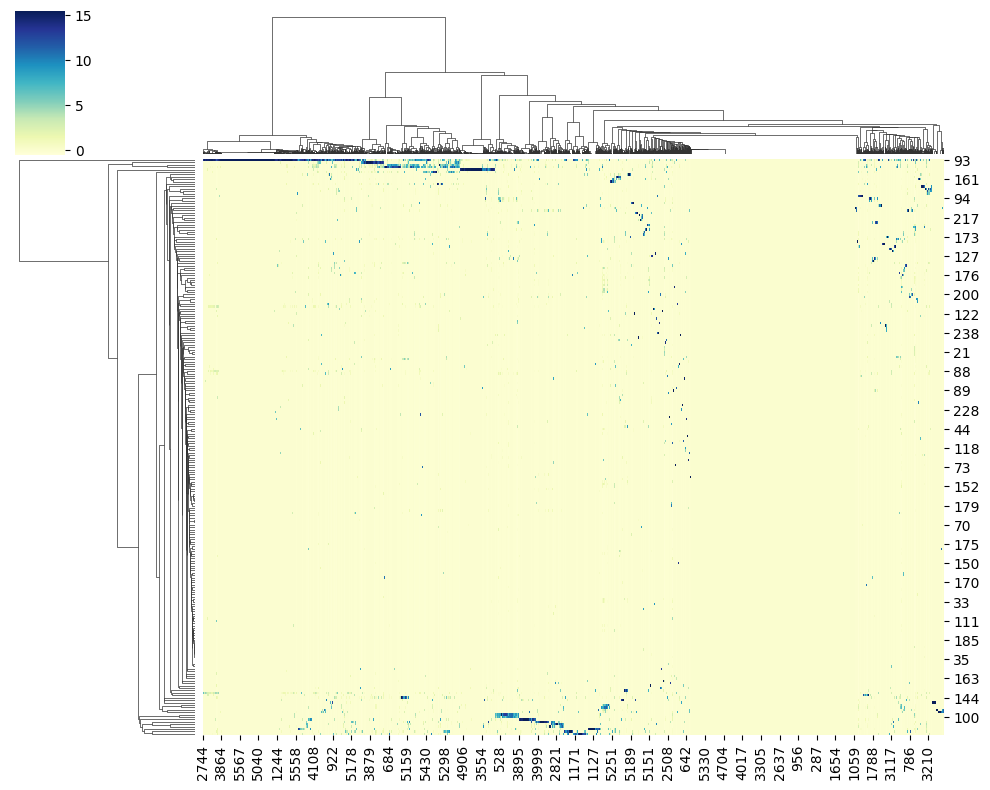

In [ ]:
# Create the clustermap with hierarchical clustering
sns.clustermap(scaled_exp,
               method='ward',  # Linkage method (ward, single, complete, average, etc.)
               metric='euclidean',  # Distance metric (euclidean, cityblock, etc.)
               cmap="YlGnBu",       # Colormap
               figsize=(10, 8))    # Figure size

### Right click the plot and save the heatmap as image

# Done. Congratulations!